In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import sklearn as sk

In [5]:
df=pd.read_csv("abc.csv")
df.head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

<Axes: >

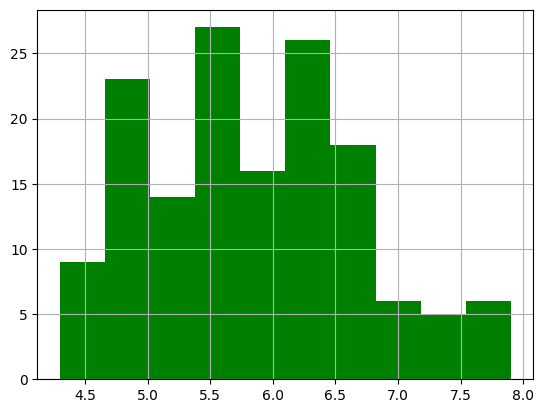

In [9]:
df['SepalLength'].hist(color='green')

<Axes: >

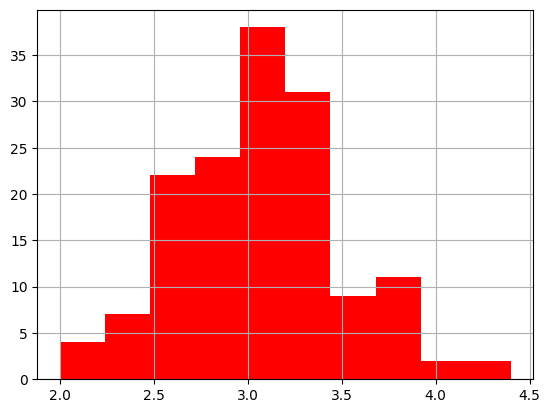

In [10]:
df['SepalWidth'].hist(color='red')

<Axes: >

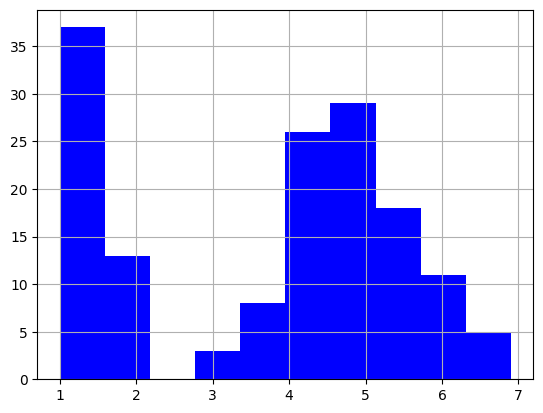

In [104]:
df['PetalLength'].hist(color='blue')

<Axes: >

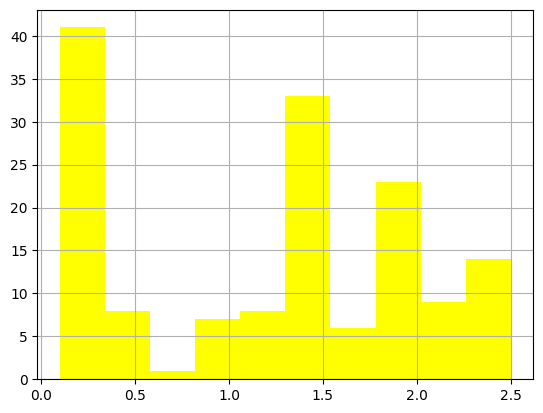

In [105]:
df['PetalWidth'].hist(color='yellow')

In histogram if its not bell shaped means it is not a normal distribution, so we can say that two classes are merged in that particular histo.
Keep in mind that if the distribution is normal,the model will be able to learn quickly

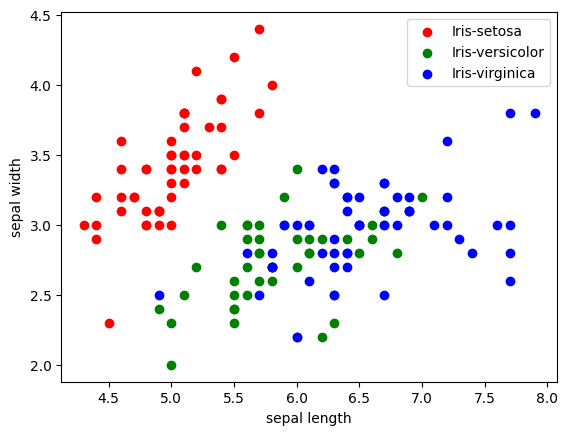

In [106]:
colors=['red','green','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x["SepalLength"],x["SepalWidth"],c=colors[i],label=species[i])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

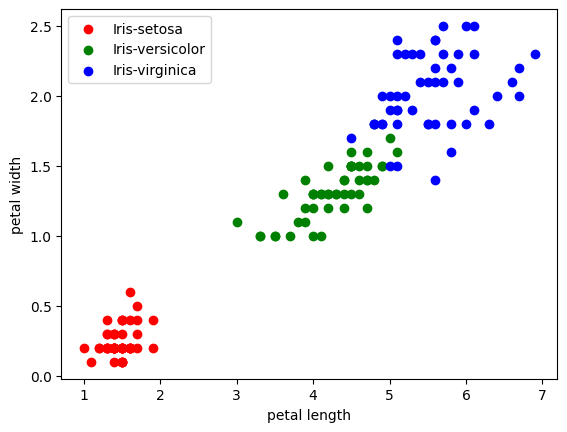

In [107]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x["PetalLength"],x["PetalWidth"],c=colors[i],label=species[i])
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()

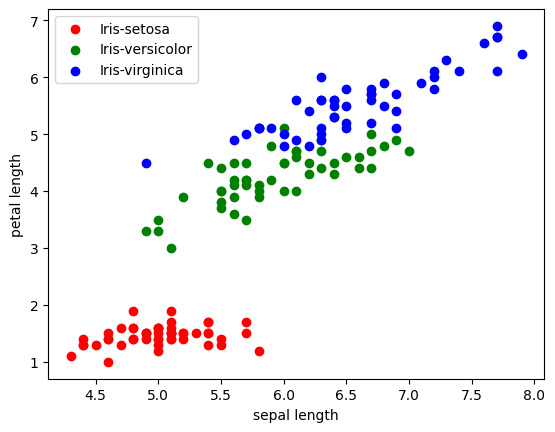

In [108]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x["SepalLength"],x["PetalLength"],c=colors[i],label=species[i])
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend()

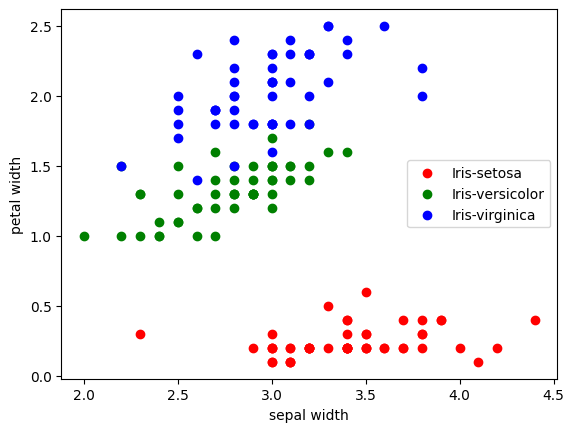

In [109]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x["SepalWidth"],x["PetalWidth"],c=colors[i],label=species[i])
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.legend()

In [11]:
#correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()


print(correlation_matrix)


             SepalLength  SepalWidth  PetalLength  PetalWidth
SepalLength     1.000000   -0.109369     0.871754    0.817954
SepalWidth     -0.109369    1.000000    -0.420516   -0.356544
PetalLength     0.871754   -0.420516     1.000000    0.962757
PetalWidth      0.817954   -0.356544     0.962757    1.000000


<Axes: >

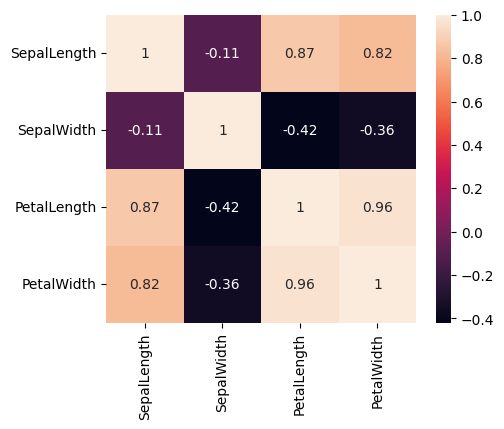

In [13]:
#Heatmap
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(correlation_matrix,annot=True,ax=ax)

In [111]:
#Label Encoding ( to convert all categories and strings to machine understandable numerical form)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [119]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Species'])
y=df['Species']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [14]:
#Import a model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [15]:
#Training the model
model.fit(X_train,Y_train)

NameError: name 'X_train' is not defined

In [16]:
# print metric to get performance
model.score(X_test,Y_test)*100#accuracy

NameError: name 'X_test' is not defined

In [17]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [18]:
model.fit(X_train,Y_train)

NameError: name 'X_train' is not defined

In [19]:
model.score(X_test,Y_test)*100

NameError: name 'X_test' is not defined